### Step One : Import packages

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### Step Two : Connect with database file

In [2]:
conn = sqlite3.connect("D:/Data/Files/DB/test.db")

### Step Three : Query each tables

##### This is customers table

In [3]:
df_customers = pd.read_sql_query("select * from customers", conn)
df_customers.dtypes

CustomerID      object
CustomerName    object
ContactName     object
Address         object
City            object
PostalCode      object
Country         object
dtype: object

##### This is categories table

In [4]:
df_categories = pd.read_sql_query("select * from categories", conn)
df_categories.dtypes

CategoryID      object
CategoryName    object
Description     object
dtype: object

##### This is employees table

In [5]:
df_employees = pd.read_sql_query("select * from employees",conn)
df_employees.dtypes

EmployeeID    object
LastName      object
FirstName     object
BirthDate     object
Photo         object
Notes         object
dtype: object

##### This is order details table

In [6]:
df_orderdetails = pd.read_sql_query("select * from orderdetails",conn)
df_orderdetails.dtypes

OrderDetailID    object
OrderID          object
ProductID        object
Quantity         object
dtype: object

##### This is orders table

In [7]:
df_orders = pd.read_sql_query("select * from orders",conn)
df_orders.dtypes

OrderID       object
CustomerID    object
EmployeeID    object
OrderDate     object
ShipperID     object
dtype: object

##### This is products table

In [8]:
df_products = pd.read_sql_query("select * from products",conn)
df_products.dtypes

ProductID      object
ProductName    object
SupplierID     object
CategoryID     object
Unit           object
Price          object
dtype: object

In [9]:
df_shippers = pd.read_sql_query("select * from shippers",conn)
df_shippers.dtypes

ShipperID      object
ShipperName    object
Phone          object
dtype: object

##### This is suppliers table

In [10]:
df_suppliers = pd.read_sql_query("select * from suppliers",conn)
df_suppliers.dtypes

SupplierID      object
SupplierName    object
ContactName     object
Address         object
City            object
PostalCode      object
Country         object
Phone           object
dtype: object

### Step Four : Join all tables into One big table
Follow ER Diagram as link : https://ibb.co/2qFB0rc

##### df_j1 is a joining of customers, employees, orders and shippers tables.

In [11]:
df_j1 = pd.read_sql_query('''select 
                          a.OrderID,
                          a.OrderDate,
                          b.*,
                          c.*,
                          d.*
                          from orders a 
                          inner join customers b
                          on a.CustomerID=b.CustomerID
                          inner join employees c
                          on a.EmployeeID=c.EmployeeID
                          inner join shippers d
                          on a.ShipperID=d.ShipperID''', conn)
df_j1

,OrderID,OrderDate,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes,ShipperID,ShipperName,Phone
0,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,5,Buchanan,Steven,3/4/1955,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...,3,Federal Shipping,(503) 555-9931
1,10249,7/5/1996,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil,6,Suyama,Michael,7/2/1963,EmpID6.pic,Michael is a graduate of Sussex University (MA...,1,Speedy Express,(503) 555-9831
2,10250,7/8/1996,34,Hanari Carnes,Mario Pontes,"Rua do Paço, 67",Rio de Janeiro,05454-876,Brazil,4,Peacock,Margaret,9/19/1958,EmpID4.pic,Margaret holds a BA in English literature from...,2,United Package,(503) 555-3199
3,10251,7/8/1996,84,Victuailles en stock,Mary Saveley,"2, rue du Commerce",Lyon,69004,France,3,Leverling,Janet,8/30/1963,EmpID3.pic,Janet has a BS degree in chemistry from Boston...,1,Speedy Express,(503) 555-9831
4,10252,7/9/1996,76,Suprêmes délices,Pascale Cartrain,"Boulevard Tirou, 255",Charleroi,B-6000,Belgium,4,Peacock,Margaret,9/19/1958,EmpID4.pic,Margaret holds a BA in English literature from...,2,United Package,(503) 555-3199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,10439,2/7/1997,51,Mère Paillarde,Jean Fresnière,43 rue St. Laurent,Montréal,H1J 1C3,Canada,6,Suyama,Michael,7/2/1963,EmpID6.pic,Michael is a graduate of Sussex University (MA...,3,Federal Shipping,(503) 555-9931
192,10440,2/10/1997,71,Save-a-lot Markets,Jose Pavarotti,187 Suffolk Ln.,Boise,83720,USA,4,Peacock,Margaret,9/19/1958,EmpID4.pic,Margaret holds a BA in English literature from...,2,United Package,(503) 555-3199
193,10441,2/10/1997,55,Old World Delicatessen,Rene Phillips,2743 Bering St.,Anchorage,99508,USA,3,Leverling,Janet,8/30/1963,EmpID3.pic,Janet has a BS degree in chemistry from Boston...,2,United Package,(503) 555-3199
194,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria,3,Leverling,Janet,8/30/1963,EmpID3.pic,Janet has a BS degree in chemistry from Boston...,2,United Package,(503) 555-3199


##### df_j2 is a joining of products, suppliers and categories tables.

In [12]:
df_j2 = pd.read_sql_query('''select 
                          e.ProductID,
                          e.ProductName,
                          e.Unit,
                          e.Price,
                          f.*,
                          g.*
                          from products e 
                          inner join suppliers f
                          on e.SupplierID=f.SupplierID
                          inner join categories g
                          on e.CategoryID=g.CategoryID''', conn)
df_j2

,ProductID,ProductName,Unit,Price,SupplierID,SupplierName,ContactName,Address,City,PostalCode,Country,Phone,CategoryID,CategoryName,Description
0,1,Chais,10 boxes x 20 bags,18,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Chang,24 - 12 oz bottles,19,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,3,Aniseed Syrup,12 - 550 ml bottles,10,1,Exotic Liquid,Charlotte Cooper,49 Gilbert St.,Londona,EC1 4SD,UK,(171) 555-2222,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,2,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,24 - 150 g jars,15,17,Svensk Sjöföda AB,Michael Björn,Brovallavägen 231,Stockholm,S-123 45,Sweden,08-123 45 67,8,Seafood,Seaweed and fish
73,74,Longlife Tofu,5 kg pkg.,10,4,Tokyo Traders,Yoshi Nagase,9-8 Sekimai Musashino-shi,Tokyo,100,Japan,(03) 3555-5011,7,Produce,Dried fruit and bean curd
74,75,Rhönbräu Klosterbier,24 - 0.5 l bottles,7.75,12,Plutzer Lebensmittelgroßmärkte AG,Martin Bein,Bogenallee 51,Frankfurt,60439,Germany,(069) 992755,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
75,76,Lakkalikööri,500 ml,18,23,Karkki Oy,Anne Heikkonen,Valtakatu 12,Lappeenranta,53120,Finland,(953) 10956,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


##### df_j3 is a joining between df_j1 and df_j2 tables.

In [13]:
df_j3 = pd.read_sql_query('''select
                          h.OrderDetailID,
                          h.Quantity,
                          i.*,
                          j.*
                          from
                          orderdetails h
                          inner join
                          (select 
                          a.OrderID,
                          a.OrderDate,
                          b.*,
                          c.*,
                          d.*
                          from orders a 
                          inner join customers b
                          on a.CustomerID=b.CustomerID
                          inner join employees c
                          on a.EmployeeID=c.EmployeeID
                          inner join shippers d
                          on a.ShipperID=d.ShipperID) i
                          on h.OrderID=i.OrderID
                          inner join
                          (select 
                          e.ProductID,
                          e.ProductName,
                          e.Unit,
                          e.Price,
                          f.*,
                          g.*
                          from products e 
                          inner join suppliers f
                          on e.SupplierID=f.SupplierID
                          inner join categories g
                          on e.CategoryID=g.CategoryID) j
                          on h.ProductID=j.ProductID''', conn)
df_j3

,OrderDetailID,Quantity,OrderID,OrderDate,CustomerID,CustomerName,ContactName,Address,City,PostalCode,...,SupplierName,ContactName,Address,City,PostalCode,Country,Phone,CategoryID,CategoryName,Description
0,1,12,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses
1,2,10,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Leka Trading,Chandra Leka,"471 Serangoon Loop, Suite #402",Singapore,0512,Singapore,555-8787,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
2,3,5,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Formaggi Fortini s.r.l.,Elio Rossi,"Viale Dante, 75",Ravenna,48100,Italy,(0544) 60323,4,Dairy Products,Cheeses
3,4,9,10249,7/5/1996,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,...,Mayumi's,Mayumi Ohno,92 Setsuko Chuo-ku,Osaka,545,Japan,(06) 431-7877,7,Produce,Dried fruit and bean curd
4,5,40,10249,7/5/1996,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,...,"G'day, Mate",Wendy Mackenzie,170 Prince Edward Parade Hunter's Hill,Sydney,2042,Australia,(02) 555-5914,7,Produce,Dried fruit and bean curd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,514,30,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses
514,515,80,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,Ma Maison,Jean-Guy Lauzon,2960 Rue St. Laurent,Montréal,H1J 1C3,Canada,(514) 555-9022,6,Meat/Poultry,Prepared meats
515,516,60,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
516,517,6,10443,2/12/1997,66,Reggiani Caseifici,Maurizio Moroni,Strada Provinciale 124,Reggio Emilia,42100,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses


### Step Five : Export df_j3 as a original joining tables.

In [14]:
df_j3.to_csv('D:/Data/Files/CSV/df_j3.csv', index=False)

In [15]:
df0 = pd.read_csv('D:\Data\Files\CSV\df_j3.csv')
df0

,OrderDetailID,Quantity,OrderID,OrderDate,CustomerID,CustomerName,ContactName,Address,City,PostalCode,...,SupplierName,ContactName.1,Address.1,City.1,PostalCode.1,Country.1,Phone.1,CategoryID,CategoryName,Description
0,1,12,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses
1,2,10,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Leka Trading,Chandra Leka,"471 Serangoon Loop, Suite #402",Singapore,0512,Singapore,555-8787,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
2,3,5,10248,7/4/1996,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,...,Formaggi Fortini s.r.l.,Elio Rossi,"Viale Dante, 75",Ravenna,48100,Italy,(0544) 60323,4,Dairy Products,Cheeses
3,4,9,10249,7/5/1996,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,...,Mayumi's,Mayumi Ohno,92 Setsuko Chuo-ku,Osaka,545,Japan,(06) 431-7877,7,Produce,Dried fruit and bean curd
4,5,40,10249,7/5/1996,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,...,"G'day, Mate",Wendy Mackenzie,170 Prince Edward Parade Hunter's Hill,Sydney,2042,Australia,(02) 555-5914,7,Produce,Dried fruit and bean curd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,514,30,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses
514,515,80,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,Ma Maison,Jean-Guy Lauzon,2960 Rue St. Laurent,Montréal,H1J 1C3,Canada,(514) 555-9022,6,Meat/Poultry,Prepared meats
515,516,60,10442,2/11/1997,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,...,New Orleans Cajun Delights,Shelley Burke,P.O. Box 78934,New Orleans,70117,USA,(100) 555-4822,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
516,517,6,10443,2/12/1997,66,Reggiani Caseifici,Maurizio Moroni,Strada Provinciale 124,Reggio Emilia,42100,...,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Calle del Rosal 4,Oviedo,33007,Spain,(98) 598 76 54,4,Dairy Products,Cheeses


### Step Six : Transformation data

#### Check columns

In [16]:
df0.columns

Index(['OrderDetailID', 'Quantity', 'OrderID', 'OrderDate', 'CustomerID',
       'CustomerName', 'ContactName', 'Address', 'City', 'PostalCode',
       'Country', 'EmployeeID', 'LastName', 'FirstName', 'BirthDate', 'Photo',
       'Notes', 'ShipperID', 'ShipperName', 'Phone', 'ProductID',
       'ProductName', 'Unit', 'Price', 'SupplierID', 'SupplierName',
       'ContactName.1', 'Address.1', 'City.1', 'PostalCode.1', 'Country.1',
       'Phone.1', 'CategoryID', 'CategoryName', 'Description'],
      dtype='object')

#### Drop duplicate columns

In [17]:
df0 = df0.drop(columns=['ContactName.1','Address.1','City.1','PostalCode.1','Country.1','Phone.1'])

#### Check columns again

In [18]:
df0.columns

Index(['OrderDetailID', 'Quantity', 'OrderID', 'OrderDate', 'CustomerID',
       'CustomerName', 'ContactName', 'Address', 'City', 'PostalCode',
       'Country', 'EmployeeID', 'LastName', 'FirstName', 'BirthDate', 'Photo',
       'Notes', 'ShipperID', 'ShipperName', 'Phone', 'ProductID',
       'ProductName', 'Unit', 'Price', 'SupplierID', 'SupplierName',
       'CategoryID', 'CategoryName', 'Description'],
      dtype='object')

#### Change data types

In [19]:
df0 = df0.astype({'OrderDate':'datetime64',
            'OrderDetailID':'int64',
            'Quantity':'int64',
            'OrderID':'int64',
            'EmployeeID':'int64',
            'ShipperID':'int64',
            'ProductID':'int64',
            'SupplierID':'int64',
            'CategoryID':'int64'})
df0.dtypes

OrderDetailID             int64
Quantity                  int64
OrderID                   int64
OrderDate        datetime64[ns]
CustomerID               object
CustomerName             object
ContactName              object
Address                  object
City                     object
PostalCode               object
Country                  object
EmployeeID                int64
LastName                 object
FirstName                object
BirthDate                object
Photo                    object
Notes                    object
ShipperID                 int64
ShipperName              object
Phone                    object
ProductID                 int64
ProductName              object
Unit                     object
Price                    object
SupplierID                int64
SupplierName             object
CategoryID                int64
CategoryName             object
Description              object
dtype: object

#### create new columns by use OrderDate as a source : OrderYear, OrderMonth, OrderDay and OrderWeekDayName 

##### OrderDate

In [20]:
ts = pd.to_datetime(df0['OrderDate'])
ts

0     1996-07-04
1     1996-07-04
2     1996-07-04
3     1996-07-05
4     1996-07-05
         ...    
513   1997-02-11
514   1997-02-11
515   1997-02-11
516   1997-02-12
517   1997-02-12
Name: OrderDate, Length: 518, dtype: datetime64[ns]

##### OrderYear

In [21]:
df0['OrderYear'] = ts.dt.year
df0['OrderYear']

0      1996
1      1996
2      1996
3      1996
4      1996
       ... 
513    1997
514    1997
515    1997
516    1997
517    1997
Name: OrderYear, Length: 518, dtype: int64

##### OrderMonth

In [22]:
df0['OrderMonth'] = ts.dt.month
df0['OrderMonth']

0      7
1      7
2      7
3      7
4      7
      ..
513    2
514    2
515    2
516    2
517    2
Name: OrderMonth, Length: 518, dtype: int64

##### OrderDay

In [23]:
df0['OrderDay'] = ts.dt.day
df0['OrderDay']

0       4
1       4
2       4
3       5
4       5
       ..
513    11
514    11
515    11
516    12
517    12
Name: OrderDay, Length: 518, dtype: int64

##### OrderWeekDayName

In [24]:
df0['OrderWeekDayName'] = ts.dt.weekday_name
df0['OrderWeekDayName']

0       Thursday
1       Thursday
2       Thursday
3         Friday
4         Friday
         ...    
513      Tuesday
514      Tuesday
515      Tuesday
516    Wednesday
517    Wednesday
Name: OrderWeekDayName, Length: 518, dtype: object

### Step Seven : Export df0 as a MetaData

In [25]:
df0.to_csv('D:\Data\Files\CSV\df0.csv', index=False)

In [26]:
df1 = pd.read_csv('D:\Data\Files\CSV\df0.csv', index_col=3, parse_dates=True)
df1

,OrderDetailID,Quantity,OrderID,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,...,Price,SupplierID,SupplierName,CategoryID,CategoryName,Description,OrderYear,OrderMonth,OrderDay,OrderWeekDayName
OrderDate,,,,,,,,,,,,,,,,,,,,,
1996-07-04,1,12,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,21,5,Cooperativa de Quesos 'Las Cabras',4,Dairy Products,Cheeses,1996,7,4,Thursday
1996-07-04,2,10,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,14,20,Leka Trading,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996,7,4,Thursday
1996-07-04,3,5,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,34.8,14,Formaggi Fortini s.r.l.,4,Dairy Products,Cheeses,1996,7,4,Thursday
1996-07-05,4,9,10249,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil,...,23.25,6,Mayumi's,7,Produce,Dried fruit and bean curd,1996,7,5,Friday
1996-07-05,5,40,10249,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil,...,53,24,"G'day, Mate",7,Produce,Dried fruit and bean curd,1996,7,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997-02-11,514,30,10442,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria,...,21,5,Cooperativa de Quesos 'Las Cabras',4,Dairy Products,Cheeses,1997,2,11,Tuesday
1997-02-11,515,80,10442,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria,...,7.45,25,Ma Maison,6,Meat/Poultry,Prepared meats,1997,2,11,Tuesday
1997-02-11,516,60,10442,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria,...,17,2,New Orleans Cajun Delights,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",1997,2,11,Tuesday


In [27]:
df1.loc['1996']

,OrderDetailID,Quantity,OrderID,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country,...,Price,SupplierID,SupplierName,CategoryID,CategoryName,Description,OrderYear,OrderMonth,OrderDay,OrderWeekDayName
OrderDate,,,,,,,,,,,,,,,,,,,,,
1996-07-04,1,12,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,21,5,Cooperativa de Quesos 'Las Cabras',4,Dairy Products,Cheeses,1996,7,4,Thursday
1996-07-04,2,10,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,14,20,Leka Trading,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",1996,7,4,Thursday
1996-07-04,3,5,10248,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,...,34.8,14,Formaggi Fortini s.r.l.,4,Dairy Products,Cheeses,1996,7,4,Thursday
1996-07-05,4,9,10249,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil,...,23.25,6,Mayumi's,7,Produce,Dried fruit and bean curd,1996,7,5,Friday
1996-07-05,5,40,10249,81,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil,...,53,24,"G'day, Mate",7,Produce,Dried fruit and bean curd,1996,7,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-30,401,120,10398,71,Save-a-lot Markets,Jose Pavarotti,187 Suffolk Ln.,Boise,83720,USA,...,24,25,Ma Maison,6,Meat/Poultry,Prepared meats,1996,12,30,Monday
1996-12-31,402,60,10399,83,Vaffeljernet,Palle Ibsen,Smagsløget 45,Århus,8200,Denmark,...,12.5,8,"Specialty Biscuits, Ltd.",3,Confections,"Desserts, candies, and sweet breads",1996,12,31,Tuesday
1996-12-31,403,30,10399,83,Vaffeljernet,Palle Ibsen,Smagsløget 45,Århus,8200,Denmark,...,21.5,15,Norske Meierier,4,Dairy Products,Cheeses,1996,12,31,Tuesday


### Step Eight : Data Visualization

[Text(0, 0.5, 'Quantity'), Text(0.5, 1.0, 'All Product sold in 1996')]

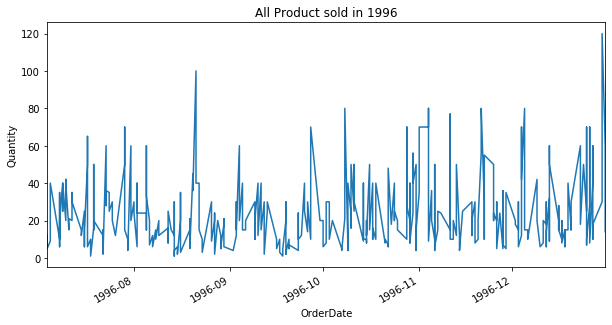

In [28]:
ax1 = df1.loc['1996']['Quantity'].plot(figsize=(10,5))
ax1.set(title='All Product sold in 1996', ylabel='Quantity')

[Text(0, 0.5, 'Quantity'), Text(0.5, 1.0, 'All Product sold in 1997')]

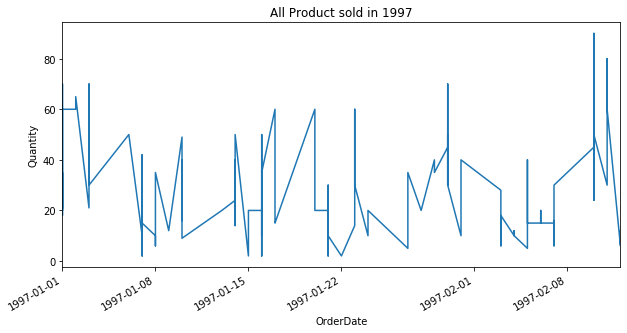

In [29]:
ax1 = df1.loc['1997']['Quantity'].plot(figsize=(10,5))
ax1.set(title='All Product sold in 1997', ylabel='Quantity')

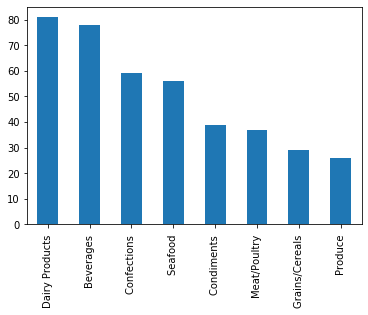

In [46]:
ax2 = df1.loc['1996']['CategoryName'].value_counts().plot.bar()

In [67]:
df1.columns

Index(['OrderDetailID', 'Quantity', 'OrderID', 'CustomerID', 'CustomerName',
       'ContactName', 'Address', 'City', 'PostalCode', 'Country', 'EmployeeID',
       'LastName', 'FirstName', 'BirthDate', 'Photo', 'Notes', 'ShipperID',
       'ShipperName', 'Phone', 'ProductID', 'ProductName', 'Unit', 'Price',
       'SupplierID', 'SupplierName', 'CategoryID', 'CategoryName',
       'Description', 'OrderYear', 'OrderMonth', 'OrderDay',
       'OrderWeekDayName'],
      dtype='object')

In [128]:
#ax3 = df4['releaseDay'][df4['kind']=='movie'].value_counts().plot.barh();
df1.loc['1996']['CategoryName'].unique()

array(['Dairy Products\xa0', 'Grains/Cereals\xa0', 'Produce\xa0',
       'Seafood\xa0', 'Condiments\xa0', 'Confections\xa0',
       'Beverages\xa0', 'Meat/Poultry\xa0'], dtype=object)

In [130]:
df1.loc['1996']['CategoryName'].value_counts()

Dairy Products     81
Beverages          78
Confections        59
Seafood            56
Condiments         39
Meat/Poultry       37
Grains/Cereals     29
Produce            26
Name: CategoryName, dtype: int64

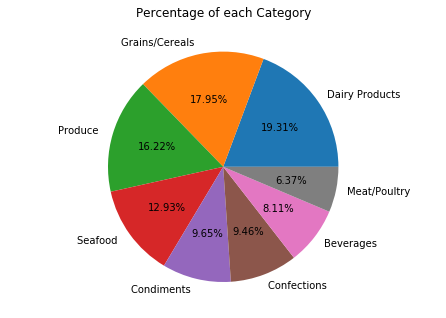

In [153]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categoryName = df1['CategoryName'].unique()
qauntity = df1['CategoryName'].value_counts()
ax.pie(qauntity, labels = categoryName,autopct='%1.2f%%')
ax.set(title='Percentage of each Category')
plt.show()

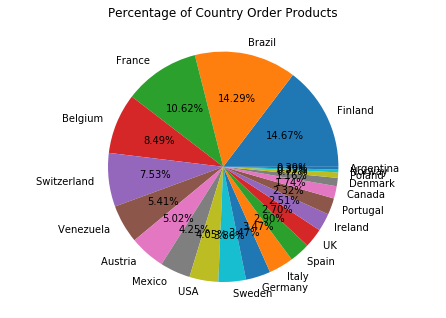

In [149]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categoryName = df1['Country'].unique()
qauntity = df1['Country'].value_counts()
ax.pie(qauntity, labels = categoryName,autopct='%1.2f%%')
ax.set(title='Percentage of Country Order Products')
plt.show()

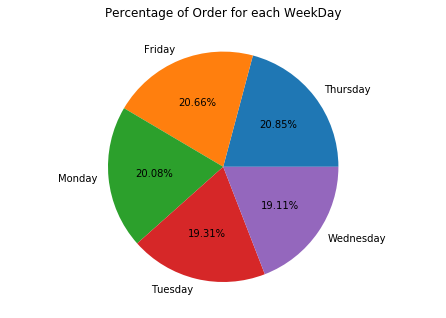

In [150]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categoryName = df1['OrderWeekDayName'].unique()
qauntity = df1['OrderWeekDayName'].value_counts()
ax.pie(qauntity, labels = categoryName,autopct='%1.2f%%')
ax.set(title='Percentage of Order for each WeekDay')
plt.show()

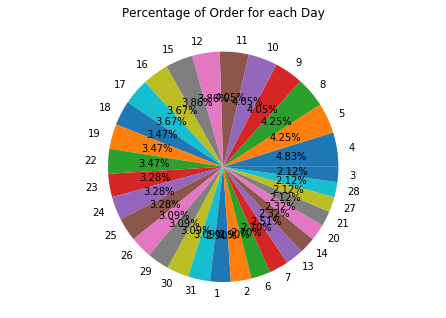

In [151]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categoryName = df1['OrderDay'].unique()
qauntity = df1['OrderDay'].value_counts()
ax.pie(qauntity, labels = categoryName,autopct='%1.2f%%')
ax.set(title='Percentage of Order for each Day')
plt.show()

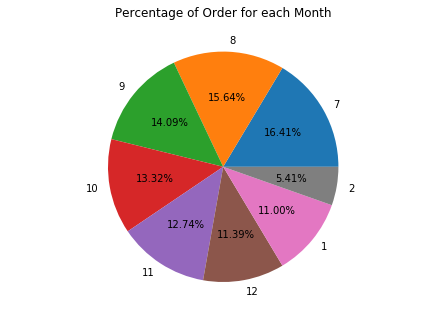

In [152]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
categoryName = df1['OrderMonth'].unique()
qauntity = df1['OrderMonth'].value_counts()
ax.pie(qauntity, labels = categoryName,autopct='%1.2f%%')
ax.set(title='Percentage of Order for each Month')
plt.show()